# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3 - Septiembre 2024

**Rotación de Personal - IBM**

#### **Nombre y matrícula: Angel Irwin Briseño Fierro - A01796844**

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [1]:
# Incluye aquí todas las librerías que consideres necesarias:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


Mounted at /content/drive


# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++


>Sin importar el tamaño de un negoció, la **rotación de personal** es un serio problema, que trae consigo afectaciones en la productividad, genera gastos por contratación y capacitación, y puede afectar el ambiente de trabajo. Por lo anterior, se requiere de un análisis detallado para encontrar las causas más probables de dicho problema y mitigarlas.


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [2]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++
file_path="/content/drive/MyDrive/IAAyAA/Semana3/WA_Fn-UseC_-HR-Employee-Attrition.csv"

df = pd.read_csv(file_path)

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

++++++++ Inicia la sección de agregar texto: ++++++++++++


>Por defecto, el metodo **"describe"** tomará solo datos cuyo tipo sea *cuantitavo*, esto es sin el argumento **include="all"**. Por el contrario, al utilizarlo, incluirá todos los valores sin importar su tipo de dato creando una tabla donde muestra las estadisticas descriptivas de tipos de datos *cuantitativos y cualitativos* en la misma tabla.


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**: Todos los encuestados son mayores de 18 años.

**b)	EmployeeCount**: El valor de conteo es 1 en todos los casos.

**c)	StandardHours**: El valor es el mismo en todos los casos 80hrs.

**d)	EmployeeNumber**: Es solo un numbero único o de identificación, por lo que no ofrece nada para la solución.

++++++++ Termina la sección de agregar texto. +++++++++++




In [3]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

#### **NOTA: Utiliza semillas en cada función de partición, para permitir la repetibilidad de tu modelo y poder evaluarlo de mejor majera.**

In [4]:
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++
X = df.drop(['Attrition'],axis=1)
y = df[['Attrition']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
Xtest, Xval, ytest, yval = train_test_split(Xtest, ytest, test_size=0.5, random_state=1)

print('Dimension del conjunto Entrenamiento: ',Xtrain.shape)
print('Dimension del conjunto Validación: ',Xval.shape)
print('Dimension del conjunto Prueba: ',Xtest.shape)
# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Dimension del conjunto Entrenamiento:  (1029, 30)
Dimension del conjunto Validación:  (221, 30)
Dimension del conjunto Prueba:  (220, 30)


# **Ejercicio 6:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [5]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
#¿Podemos decir que tenemos un problema de clasificación desbalanceado? Si, la relación no esta cerca de ser 50-50%

le = LabelEncoder()
ytrainT = pd.DataFrame(le.fit_transform(ytrain), columns=ytrain.columns)
yvalT = pd.DataFrame(le.fit_transform(yval), columns=yval.columns)
ytestT = pd.DataFrame(le.fit_transform(ytest), columns=yval.columns)


# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++


print('Porcentaje de datos en cada clase de entrenamiento - Attrition:', ytrainT['Attrition'].value_counts() / ytrainT.shape[0])

Porcentaje de datos en cada clase de entrenamiento - Attrition: Attrition
0    0.838678
1    0.161322
Name: count, dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Ejercicio 7:**


#### **Incluye a continuación el análisis gáfico y describtivo que consideres adecuado. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**
>Para los valores numéricos, el uso de boxplots facilita la visualización de outliers, el uso de histograma ayuda a observar la distribución de los datos y si es normal o sesgada.
Para el caso de los datos de tipo cualitativo el uso de los gráficos de barra ayudar a visualizar los datos para cada caso.
Finalmente, en ambos casos el conteo de casos nulos es importante para saber si no hay un desbalance significativo en las variables.

Una vez realizado el análisis (observado en las siguientes celdas) se observa que variables en las variables númericas la mayoria tiene valores atípicos y sus distribuciones tienden a ser sesgadas positivas.

En ningún caso hay valores perdidos o nulos.

In [6]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres conveniente.

numVar = ['NumCompaniesWorked',
          'TrainingTimesLastYear',
          'Age',
          'DailyRate',
          'DistanceFromHome',
          'HourlyRate',
          'MonthlyIncome',
          'MonthlyRate',
          'PercentSalaryHike',
          'TotalWorkingYears',
          'YearsAtCompany',
          'YearsInCurrentRole',
          'YearsSinceLastPromotion',
          'YearsWithCurrManager']
ordVar=['Education',
        'EnvironmentSatisfaction',
        'JobInvolvement',
        'JobLevel',
        'JobSatisfaction',
        'PerformanceRating',
        'RelationshipSatisfaction',
        'StockOptionLevel',
        'WorkLifeBalance']
binVar=['Gender',
        'OverTime']
nomVar=['BusinessTravel',
        'Department',
        'EducationField',
        'JobRole',
        'MaritalStatus']

#Valores faltantes en tipos de datos numericos
display(df[numVar].isna().sum())



# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



,0
NumCompaniesWorked,0
TrainingTimesLastYear,0
Age,0
DailyRate,0
DistanceFromHome,0
HourlyRate,0
MonthlyIncome,0
MonthlyRate,0
PercentSalaryHike,0
TotalWorkingYears,0


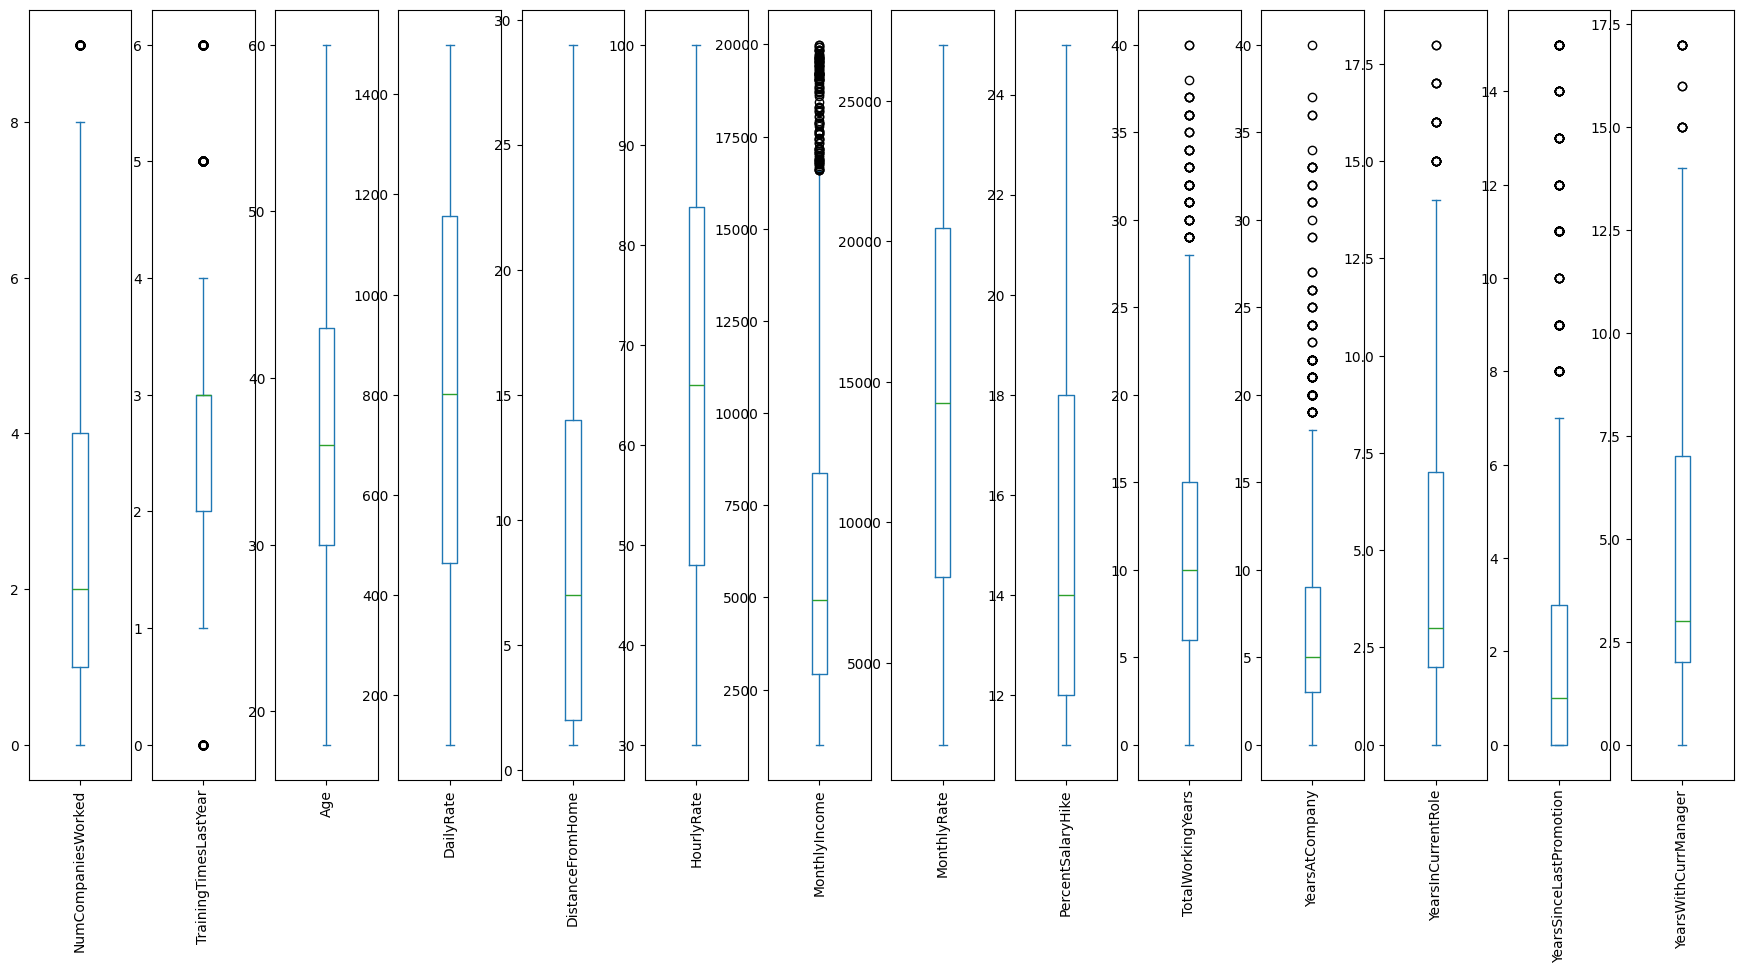

In [7]:
df[numVar].plot(kind='box', subplots=True,figsize=(22,10),rot=90)
plt.show()

In [8]:
def CantidadOutliers(x):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)
  IQR = Q3 - Q1
  ll = Q1 - 1.5 * IQR
  ul = Q3 + 1.5 * IQR
  outliers = (x < ll) | (x > ul)
  return (outliers.sum(),(outliers.sum()/x.shape[0])*100)

In [9]:
#Análisis descriptivo de valores atípicos
for i in df.select_dtypes(include=np.number).columns:
  c = CantidadOutliers(df[i])
  if c[0] > 0:
    print(f'{i}:',c[0], "or", round(c[1],2),"%")

MonthlyIncome: 114 or 7.76 %
NumCompaniesWorked: 52 or 3.54 %
PerformanceRating: 226 or 15.37 %
StockOptionLevel: 85 or 5.78 %
TotalWorkingYears: 63 or 4.29 %
TrainingTimesLastYear: 238 or 16.19 %
YearsAtCompany: 104 or 7.07 %
YearsInCurrentRole: 21 or 1.43 %
YearsSinceLastPromotion: 107 or 7.28 %
YearsWithCurrManager: 14 or 0.95 %


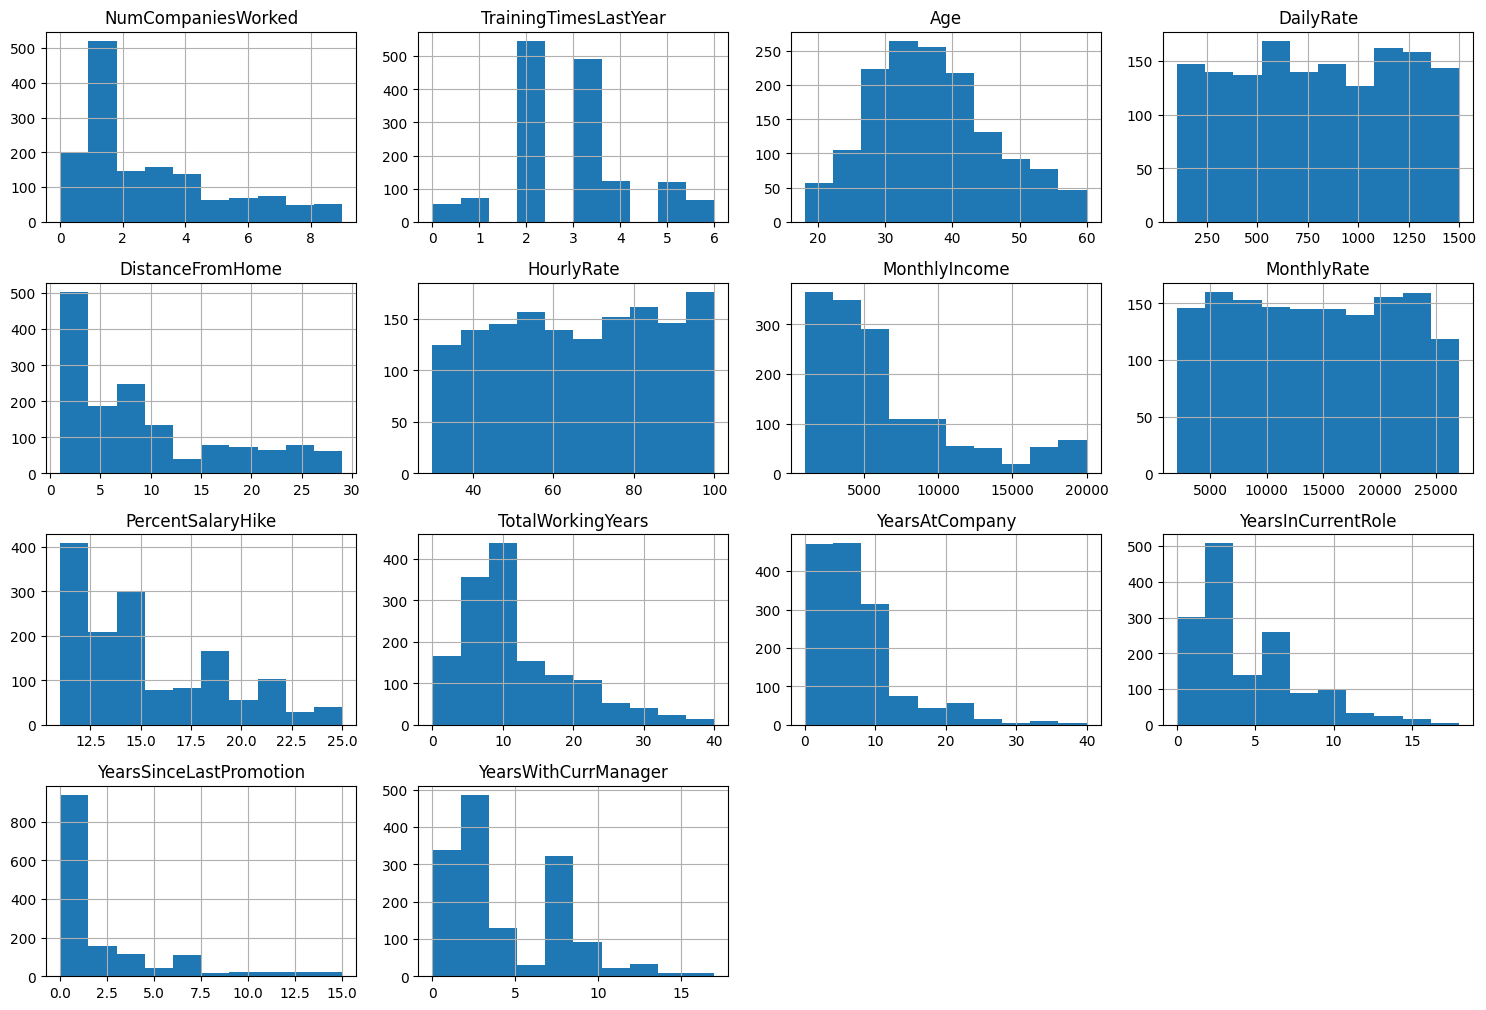

In [10]:
df[numVar].hist(figsize=(15,15), layout=(6,4))
plt.tight_layout()
plt.show()

In [11]:
def GrafBarras(var,sizeX,sizeY):
  fig,axes = plt.subplots(1,len(var),figsize=(sizeX,sizeY))
  print('Estadisticas descriptivas')
  display(df[var].describe().T)
  print()
  print('Valores faltantes')
  display(df[var].isna().sum())
  for n in var:
    plt.subplot(1, len(var), var.index(n)+1)
    df[n].value_counts().plot.bar()

  plt.tight_layout()
  plt.show()

Estadisticas descriptivas


,count,unique,top,freq
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673



Valores faltantes


,0
BusinessTravel,0
Department,0
EducationField,0
JobRole,0
MaritalStatus,0


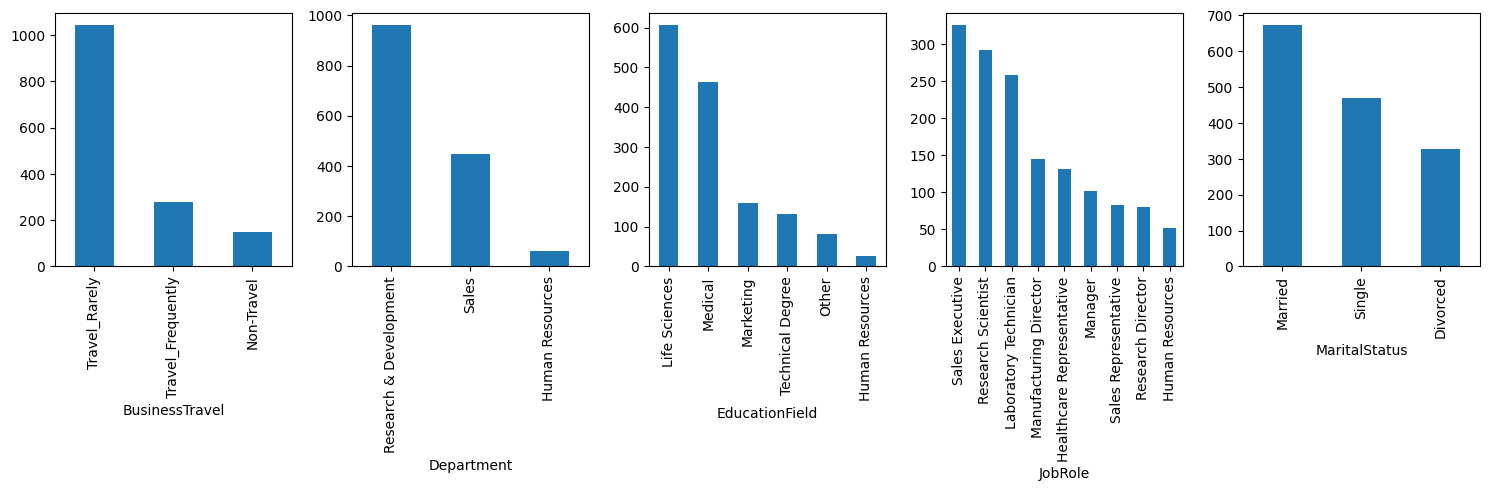

In [12]:
#Graficos de barra para variables nominales
GrafBarras(nomVar,15,5)

Estadisticas descriptivas


,count,mean,std,min,25%,50%,75%,max
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
PerformanceRating,1470.0,3.153741,0.360824,3.0,3.0,3.0,3.0,4.0
RelationshipSatisfaction,1470.0,2.712245,1.081209,1.0,2.0,3.0,4.0,4.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0



Valores faltantes


,0
Education,0
EnvironmentSatisfaction,0
JobInvolvement,0
JobLevel,0
JobSatisfaction,0
PerformanceRating,0
RelationshipSatisfaction,0
StockOptionLevel,0
WorkLifeBalance,0


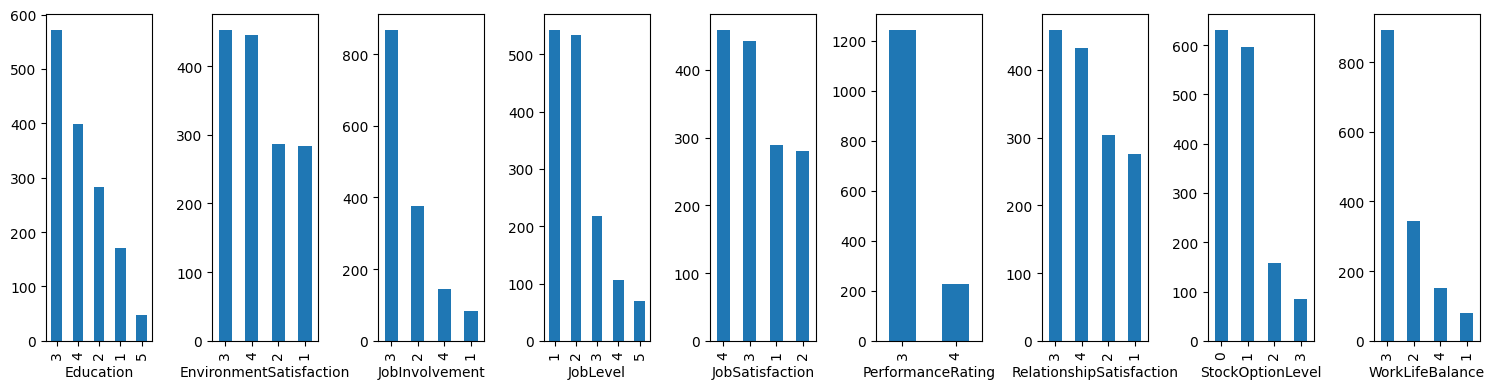

In [13]:
#Graficos de barra para variables ordinales
GrafBarras(ordVar,15,4)

Estadisticas descriptivas


,count,unique,top,freq
Gender,1470,2,Male,882
OverTime,1470,2,No,1054



Valores faltantes


,0
Gender,0
OverTime,0


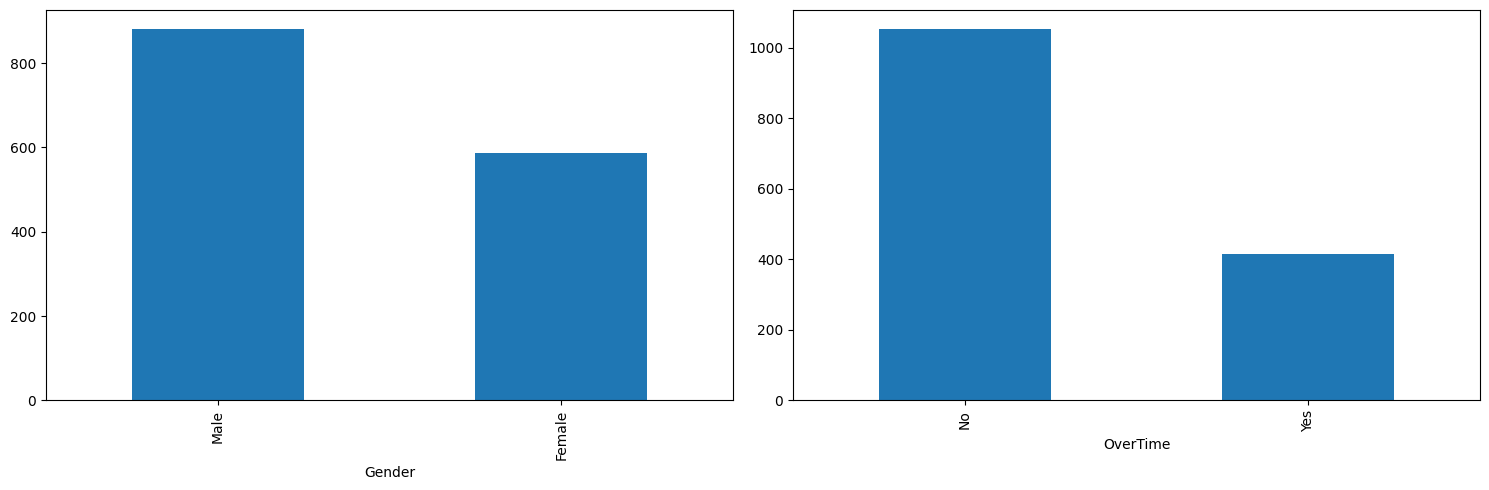

In [14]:
#Graficos de barra para variables binarias
GrafBarras(binVar,15,5)

# **Ejercicio 8:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**



In [15]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


# NUMÉRICAS:
numericas_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])
numericas_pipeline_nombres = numVar

# ORDINALES:
catOrd_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                    ('OrdEnc',OrdinalEncoder())])
catOrd_pipeline_nombres = ordVar

# BINARIAS:
catBin_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                    ('oheStp', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))])
catBin_pipeline_nombres = binVar

# NOMINALES:
catNom_pipeline =Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                   ('oheStp', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))])
catNom_pipeline_nombres = nomVar



columnasTransformer = ColumnTransformer(transformers = [('numpipe', numericas_pipeline, numericas_pipeline_nombres),
                                                        ('catimp', catOrd_pipeline, catOrd_pipeline_nombres),
                                                        ('catbin', catBin_pipeline, catBin_pipeline_nombres),
                                                        ('catNom', catNom_pipeline, catNom_pipeline_nombres)],
                                        remainder='passthrough')

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 9:**

#### **Reagrupa los conjuntos de entrenamiento y validación en un solo DataFrame.**

#### **A estos nuevos DataFrame llamarlos Xtv y ytv.**

In [16]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


Xtv = pd.concat([Xtrain, Xval])
ytv = pd.concat([ytrainT, yvalT])


# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

print(Xtv.shape)
print(ytv.shape)

(1250, 30)
(1250, 1)


# **Ejercicio 10:**

#### **Busca los mejores hiperparámetros.**

>> LR 0.874 (0.018)
>> LASSO 0.883 (0.017)
>> RIDGE 0.881 (0.017)
>> EN 0.881 (0.016)
>> kNN 0.849 (0.013)


<ipython-input-17-a04c8d50bd98>:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.


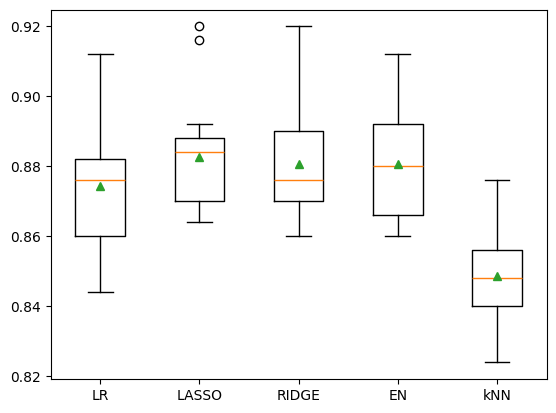

In [17]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Regresión Logística sin regularización:
  modelos.append(LogisticRegression(penalty=None,  # Este valor de "penalty" no se debe de cambiar, ya que define el modelo sin regularización.
                                    solver='lbfgs', max_iter=2000,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LR')


  # Lasso - Regresión Logística con regularización L1:
  modelos.append(LogisticRegression(penalty='l1',
                                    solver='liblinear', max_iter=2000, C=1,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LASSO')


  # Ridge - Regresión Logística con regularización L2:
  modelos.append(LogisticRegression(penalty='l2',
                                    solver='liblinear', max_iter=2000, C=1,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('RIDGE')


  # Elastic_Net - - Regresión Logística con regularización L1 y L2:
  modelos.append(LogisticRegression(penalty='elasticnet',
                                    l1_ratio=0.5, solver='saga', max_iter=4000, C=1,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('EN')



  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier()) # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
  nombres.append('kNN')

  return modelos, nombres

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# Entrenamos los modelos:

modelos, nombres = mis_modelos()  # accesando los modelos.
resultados = list()    # para guardar los resultados en esta lista.

# Iterando y entrenando sobre cada modelo:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Transformaciones y modelo en un Pipeline.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # entrenando y generando los resultados.

  resultados.append(scores)    # guardando los resultados en la lista.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # desplegando los promedios de cada modelo.


plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.
plt.show()

# **Ejercicio 11:**

#### **Utilizando el mejor modelo y los datos Xtv, ytv, realiza una búsqueda de malla para encontrar los mejores hiperparámetros. Verifica que el modelo no esté subentrenado o sobreentrenado.**



In [26]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

modelo = LogisticRegression(penalty='l1', max_iter=2000, random_state=1,C=1)
# modelo = LogisticRegression(penalty='elasticnet',l1_ratio=0.5, max_iter=2000, random_state=1,C=1)        # tarda unos 40 segs

dicc_grid = {'C':[i/5 for i in range(1,10)],
             'solver':['liblinear','saga']
             }

# dicc_grid = {'C':[i/5 for i in range(1,10)],
#              'solver':['saga']
#              }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

grid = GridSearchCV(estimator=modelo,
                    param_grid=dicc_grid,
                    cv=cv,
                    scoring='accuracy',  # podemos seleccionar otras métricas: 'accuracy', 'f1', 'precision', 'recall'
                    n_jobs=-1,
                    return_train_score=True    # podemos obtener los de entrenamiento para verificar sobreentrenamiento.
                    )

Xx = columnasTransformer.fit_transform(Xtv)

grid_result = grid.fit(Xx, np.ravel(ytv))

#mejor_modelo = None


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print('Promedios Train mean(std): %.4f(%.4f)' % (np.nanmean(grid_result.cv_results_['mean_train_score']),
                                                 np.nanmean(grid_result.cv_results_['std_train_score'])))
print('Promedios Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(),
                                               grid_result.cv_results_['std_test_score'].mean()))


Mejor modelo: 0.885333 usando {'C': 0.6, 'solver': 'saga'}
Promedios Train mean(std): 0.8918(0.0048)
Promedios Val mean(std): 0.8805(0.0125)


In [28]:
print('Train mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_train_score'].mean(), grid_result.cv_results_['std_train_score'].mean()))
print('Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(), grid_result.cv_results_['std_test_score'].mean()))

Train mean(std): 0.8918(0.0048)
Val mean(std): 0.8805(0.0125)


# **Ejercicio 12:**

#### **Con los mejores valores de hiperparámetros del mejor modelo encontrado, obtener:**

*   #### **a) Matriz de Confusión.**
*   #### **b) Análisis de Imprtancia de Factores.**
*   #### **c) Reporte de métricas.**

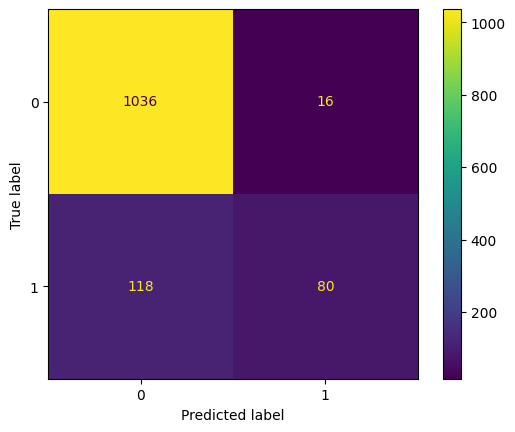

In [29]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
# Incluye todas las celdas que consideres adecuado para responder
# estos tres incisos del ejercicio.

modelo_mejor = LogisticRegression(penalty='l1',
                                  max_iter=2000,
                                  solver='saga',
                                  C=0.6,
                                  random_state=1)

Xx = columnasTransformer.fit_transform(Xtv)

mejor_result = modelo_mejor.fit(Xx, np.ravel(ytv))

oheTest=OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
yTestOhe = oheTest.fit_transform(ytest)

mejor_result.score(columnasTransformer.transform(Xtest), yTestOhe)

ConfusionMatrixDisplay.from_estimator(mejor_result, Xx, np.ravel(ytv))
plt.show()


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

In [30]:
pd.DataFrame(data = mejor_result.coef_.reshape(-1,1),
             index = columnasTransformer.get_feature_names_out()).sort_values(by=0, ascending=False)

,0
catbin__OverTime_Yes,1.651226
numpipe__YearsSinceLastPromotion,1.477357
catNom__BusinessTravel_Travel_Frequently,1.204037
numpipe__NumCompaniesWorked,1.149305
numpipe__DistanceFromHome,0.893689
catNom__JobRole_Laboratory Technician,0.811909
catNom__MaritalStatus_Single,0.781035
catNom__EducationField_Technical Degree,0.699860
catNom__JobRole_Sales Representative,0.459595
catbin__Gender_Male,0.347016


In [31]:
print(classification_report(yTestOhe, mejor_result.predict(columnasTransformer.transform(Xtest))))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       181
         1.0       0.87      0.33      0.48        39

    accuracy                           0.87       220
   macro avg       0.87      0.66      0.70       220
weighted avg       0.87      0.87      0.85       220



# **Ejercicio 13**

#### **Obtener el desempeño final del modelo (accuracy) con el conjunto de prueba (test).**

In [32]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

mejor_result.score(columnasTransformer.transform(Xtest), yTestOhe)

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

0.8727272727272727

# **Ejercicio 14**

#### **Incluye tus conclusiones finales de la actividad.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++

>La actividad sirvio para comprender el funcionamiento y aplicación de la regresesión lógistica de sklearn, asi como aprender técnicas que ayudan a encontrar las mejores relaciones de parámetros (e hiperparámetros) y análizar los resultados obtenidos del modelo seleccionado, con la finalidad de determinar si el mismo ejecutará de la mejor manera las predicciones requeridas.

#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# >> **Fin de la Actividad de la Semana 3** <<